In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
btc_df = pd.read_csv('./data/BTC_USD.csv')
snp_df = pd.read_csv('./data/snp500.csv')

In [5]:
snp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Date      4665 non-null   object
 1   Price     4665 non-null   object
 2   Open      4665 non-null   object
 3   High      4665 non-null   object
 4   Low       4665 non-null   object
 5   Vol.      4069 non-null   object
 6   Change %  4665 non-null   object
dtypes: object(7)
memory usage: 255.2+ KB


In [10]:
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      4665 non-null   datetime64[ns]
 1   Price     4665 non-null   object        
 2   Open      4665 non-null   object        
 3   High      4665 non-null   object        
 4   Low       4665 non-null   object        
 5   Vol.      4069 non-null   object        
 6   Change %  4665 non-null   object        
dtypes: datetime64[ns](1), object(6)
memory usage: 255.2+ KB


In [18]:
def clean_and_convert(df):
    for col in df.columns:
        # Object 타입을 각각의 맞는 타입으로 변경
        if df[col].dtype == 'O':

            # 숫자와 문자로 이루어져 있어 해당 데이터를 숫자로 변경하기 위한 작업
            if col == 'Vol.':
                df[col] = df[col].replace({'K': '*1e3', 'M': '*1e6'}, regex=True)
                df[col] = df[col].apply(lambda x: eval(str(x)) if isinstance(x, str) else x)
            
            elif col == 'Change %':
                df[col] = df[col].str.replace('%', '', regex=True) 
                
            df[col] = df[col].astype(str)
            df[col] = df[col].str.replace(',', '', regex=True) 
        
        df[col] = pd.to_numeric(df[col], errors='coerce')
    return df

In [20]:
btc_df = clean_and_convert(btc_df)
btc_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4665 entries, 0 to 4664
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Date      4665 non-null   int64  
 1   Price     4665 non-null   float64
 2   Open      4665 non-null   float64
 3   High      4665 non-null   float64
 4   Low       4665 non-null   float64
 5   Vol.      4069 non-null   float64
 6   Change %  4665 non-null   float64
dtypes: float64(6), int64(1)
memory usage: 255.2 KB


In [52]:
# 날짜 타입 변경
btc_df['Date'] = pd.to_datetime(btc_df['Date'])
snp_df['Date'] = pd.to_datetime(snp_df['Date'], errors='coerce').dt.tz_localize(None)

btc_df['Price'] = (btc_df['High'] + btc_df['Low']) / 2
snp_df['Price'] = (snp_df['High'] + snp_df['Low']) / 2

In [53]:
snp_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23970 entries, 0 to 23969
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   Date          23970 non-null  datetime64[ns]
 1   Open          23970 non-null  float64       
 2   High          23970 non-null  float64       
 3   Low           23970 non-null  float64       
 4   Close         23970 non-null  float64       
 5   Volume        23970 non-null  int64         
 6   Dividends     23970 non-null  float64       
 7   Stock Splits  23970 non-null  float64       
 8   Price         23970 non-null  float64       
dtypes: datetime64[ns](1), float64(7), int64(1)
memory usage: 1.6 MB


In [54]:
snp_df.describe()

,Date,Open,High,Low,Close,Volume,Dividends,Stock Splits,Price
count,23970,23970.000000,23970.000000,23970.000000,23970.000000,2.397000e+04,23970.0,23970.0,23970.000000
mean,1975-10-19 01:08:18.773466848,565.155536,588.712980,581.470939,585.323645,8.698602e+08,0.0,0.0,585.091959
min,1927-12-30 05:00:00,0.000000,4.400000,4.400000,4.400000,0.000000e+00,0.0,0.0,4.400000
25%,1951-12-28 23:00:00,9.540000,24.440001,24.440001,24.440001,1.440000e+06,0.0,0.0,24.440001
50%,1975-11-20 17:00:00,40.684999,102.180000,100.580002,101.405003,1.917500e+07,0.0,0.0,101.397499
75%,1999-08-09 22:00:00,961.247513,970.832520,951.692520,962.402512,8.148750e+08,0.0,0.0,960.589996
max,2023-06-02 04:00:00,4804.509766,4818.620117,4780.040039,4796.560059,1.145623e+10,0.0,0.0,4796.445068
std,NaN,941.065938,935.183705,923.945440,929.927708,1.591868e+09,0.0,0.0,929.552987


In [55]:
btc_df.describe()

,Date,Price,Open,High,Low,Vol.,Change %
count,4665,4665.000000,4665.000000,4665.000000,4665.000000,4069.000000,4665.000000
mean,2018-08-28 03:08:36.270096384,16135.995723,16141.718950,16508.115520,15763.875927,13484.025559,0.295576
min,2012-04-06 00:00:00,4.700000,4.700000,4.700000,4.700000,0.000000,-38.180000
25%,2015-06-18 00:00:00,438.050000,439.000000,446.500000,430.500000,1790.000000,-1.260000
50%,2018-08-29 00:00:00,6606.350000,6627.300000,6778.300000,6511.500000,6010.000000,0.110000
75%,2021-11-07 00:00:00,26491.500000,26365.000000,26804.000000,26018.000000,16370.000000,1.800000
max,2025-01-16 00:00:00,106620.000000,106000.000000,108080.000000,105160.000000,274850.000000,36.150000
std,NaN,21754.264747,21760.281382,22224.553365,21290.305761,20144.169481,4.076950


In [64]:
btc_df['Date'] = pd.to_datetime(btc_df['Date']).dt.date
snp_df['Date'] = pd.to_datetime(snp_df['Date']).dt.date

In [65]:
# 겹치는 날짜 범위 확인
snp_start, snp_end = snp_df['Date'].min(), snp_df['Date'].max()
btc_start, btc_end = btc_df['Date'].min(), btc_df['Date'].max()

# 공통 날짜 범위 설정
common_start = max(snp_start, btc_start)
common_end = min(snp_end, btc_end)

print(f"공통 날짜 범위: {common_start} ~ {common_end}")


공통 날짜 범위: 2012-04-06 ~ 2023-06-02


In [67]:
common_dates = pd.merge(
    snp_df[['Date', 'Price']], 
    btc_df[['Date', 'Price']], 
    on='Date', 
    suffixes=('_snp', '_btc')
)

# 병합 결과 확인
print(common_dates.head())
print(f"공통 데이터 개수: {len(common_dates)}")

         Date    Price_snp  Price_btc
0  2012-04-09  1387.844971        4.9
1  2012-04-10  1370.195007        4.8
2  2012-04-11  1366.844971        4.9
3  2012-04-12  1378.450012        4.9
4  2012-04-13  1378.729980        4.9
공통 데이터 개수: 2806


[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000294 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2686, number of used features: 11
[LightGBM] [Info] Start training from score 10044.000931
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000152 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 2805
[LightGBM] [Info] Number of data points in the train set: 2686, number of used features: 11
[LightGBM] [Info] Start training from score 2656.808433
BTC Prediction Metrics:
  MAE  : 850.6715
  RMSE : 1134.2732
  R²   : 0.8959

SNP Prediction Metrics:
  MAE  : 32.3165
  RMSE : 40.4096
  R²   : 0.8295



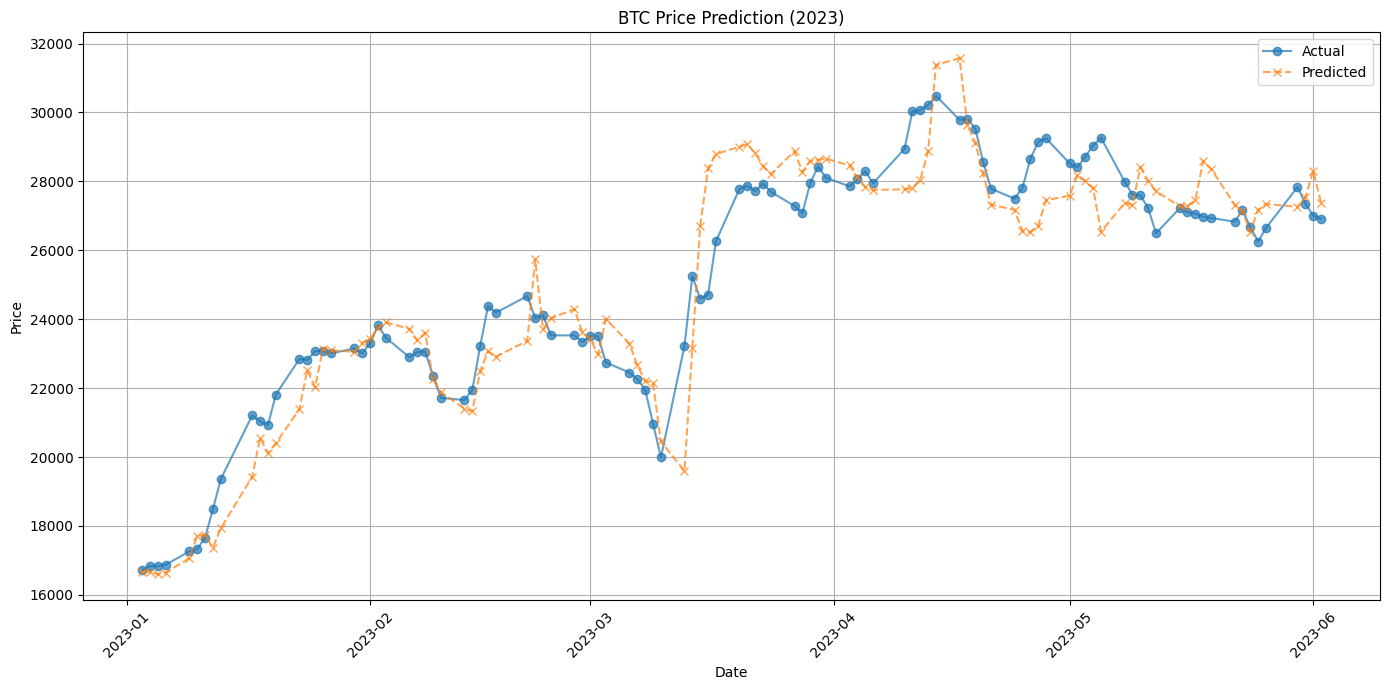

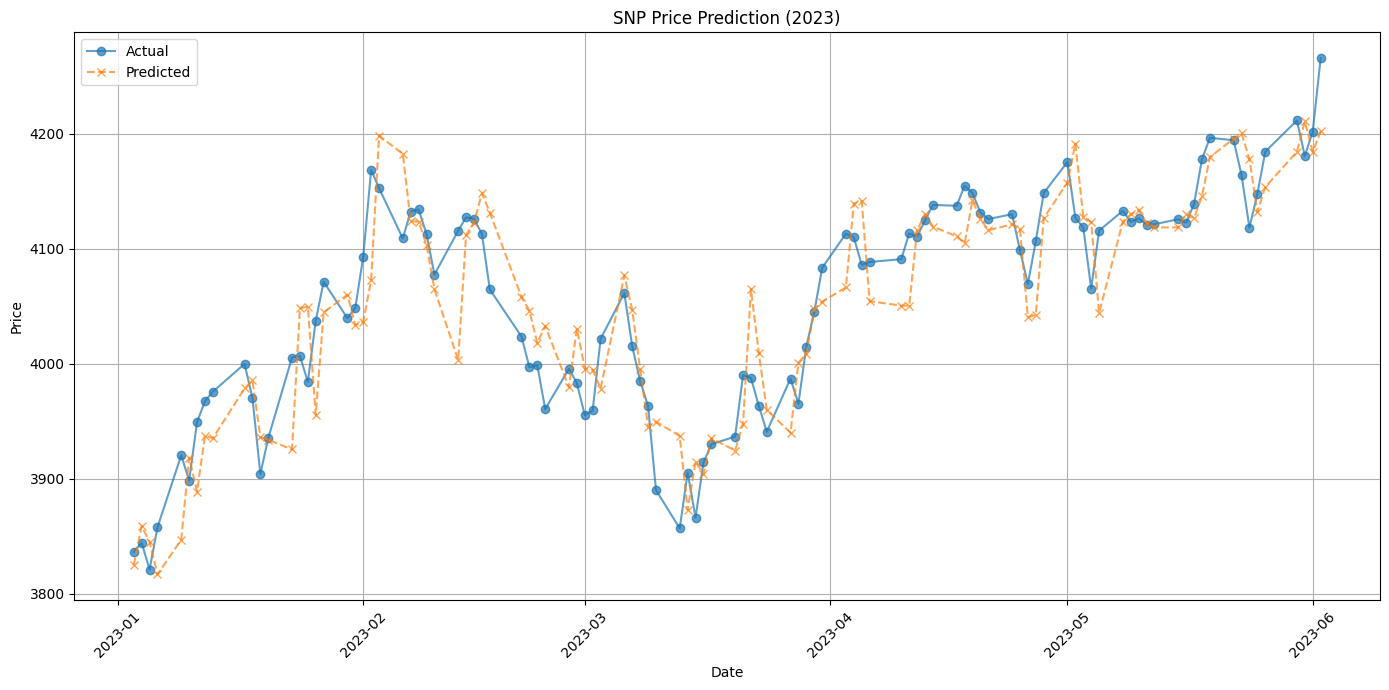

In [114]:
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


# 1. 과거 데이터를 기반으로 lag features 생성 함수
def create_lag_features(df, target_col, lags=5):
    for lag in range(1, lags + 1):
        df[f"{target_col}_lag_{lag}"] = df[target_col].shift(lag)
    return df

# 2. 데이터 준비
common_dates['Date'] = pd.to_datetime(common_dates['Date'])
common_dates = common_dates.sort_values(by='Date').reset_index(drop=True)

# lag features 생성 (5일 이전 데이터 활용)
lags = 5
common_dates = create_lag_features(common_dates, 'Price_btc', lags)
common_dates = create_lag_features(common_dates, 'Price_snp', lags)

# NaN 제거 (lag feature 생성 시 생기는 앞부분 결측치)
common_dates = common_dates.dropna()

# 3. 2022년까지 학습 데이터, 2023년 테스트 데이터 분리
train_data = common_dates[common_dates['Date'] < '2023-01-01']
test_data = common_dates[common_dates['Date'] >= '2023-01-01']

# 입력과 출력 데이터 분리
X_train_btc = train_data.drop(['Date', 'Price_btc'], axis=1)
y_train_btc = train_data['Price_btc']
X_test_btc = test_data.drop(['Date', 'Price_btc'], axis=1)
y_test_btc = test_data['Price_btc']

X_train_snp = train_data.drop(['Date', 'Price_snp'], axis=1)
y_train_snp = train_data['Price_snp']
X_test_snp = test_data.drop(['Date', 'Price_snp'], axis=1)
y_test_snp = test_data['Price_snp']

# 4. 모델 학습
btc_model = LGBMRegressor(random_state=42)
snp_model = LGBMRegressor(random_state=42)

btc_model.fit(X_train_btc, y_train_btc)
snp_model.fit(X_train_snp, y_train_snp)

# 5. 예측
btc_preds = btc_model.predict(X_test_btc)
snp_preds = snp_model.predict(X_test_snp)

# 6. 모델 성능 평가
def evaluate_model(actual, predicted, label):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    print(f"{label} Prediction Metrics:")
    print(f"  MAE  : {mae:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  R²   : {r2:.4f}")
    print()

# BTC 모델 평가
evaluate_model(y_test_btc, btc_preds, label="BTC")

# SNP 모델 평가
evaluate_model(y_test_snp, snp_preds, label="SNP")

# 7. 시각화
def plot_predictions_with_time(date_index, actual, predicted, title):
    plt.figure(figsize=(14, 7))
    plt.plot(date_index, actual, label="Actual", marker='o', linestyle='-', alpha=0.7)
    plt.plot(date_index, predicted, label="Predicted", marker='x', linestyle='--', alpha=0.7)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 테스트 데이터의 날짜
btc_test_dates = test_data['Date']
snp_test_dates = test_data['Date']

# BTC 예측 결과 시각화
plot_predictions_with_time(btc_test_dates, y_test_btc, btc_preds, title="BTC Price Prediction (2023)")

# SNP 예측 결과 시각화
plot_predictions_with_time(snp_test_dates, y_test_snp, snp_preds, title="SNP Price Prediction (2023)")


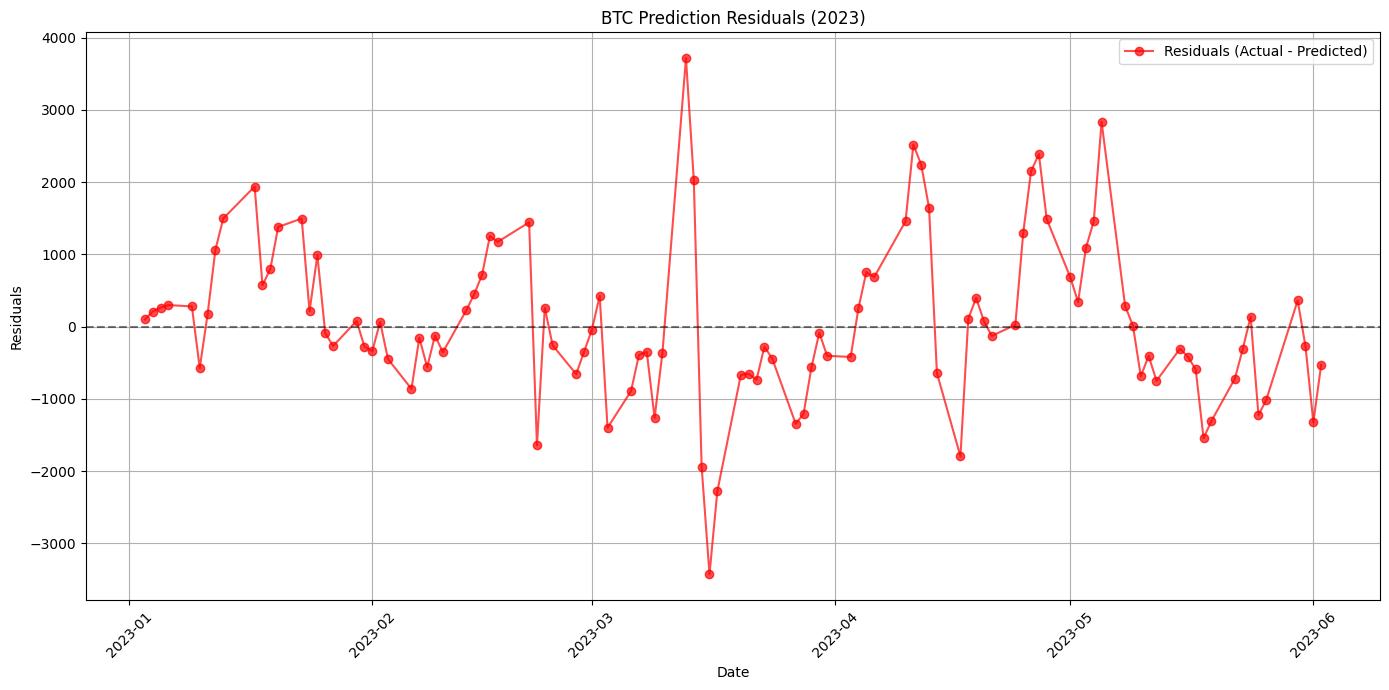

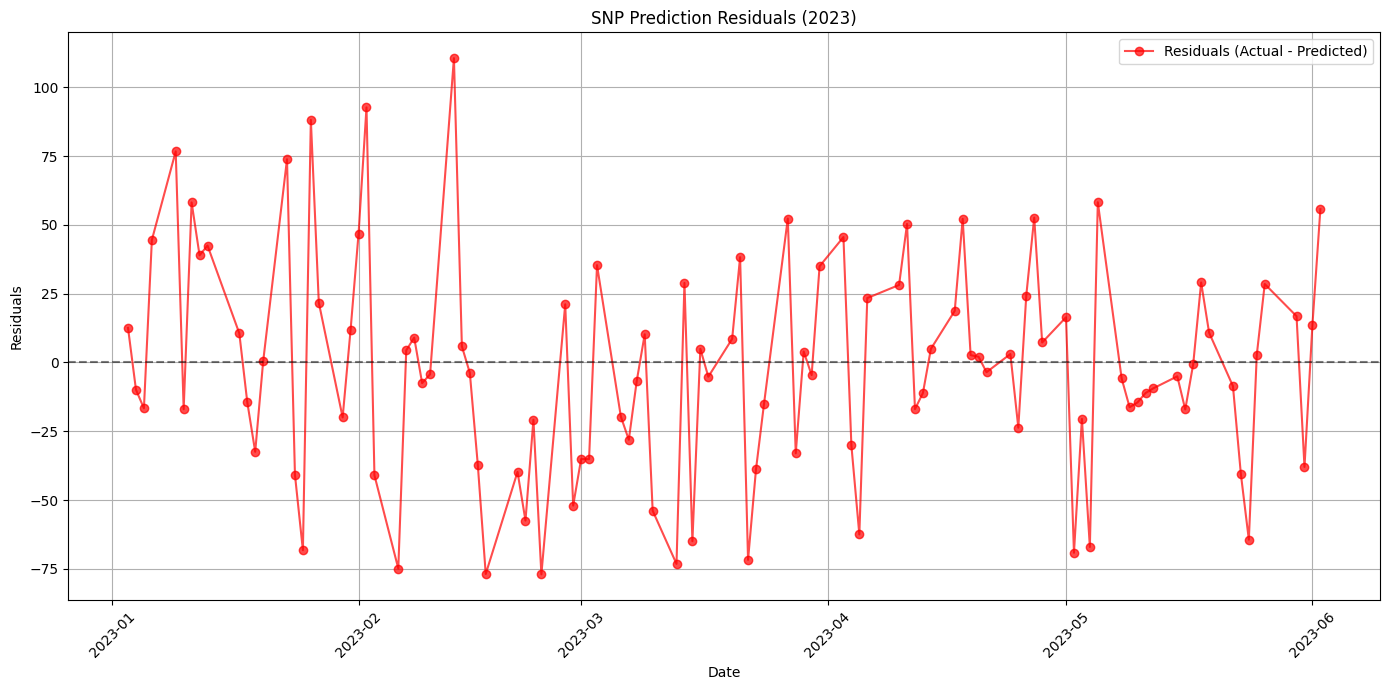

In [113]:
def plot_residuals(date_index, actual, predicted, title):
    residuals = actual.values - predicted
    plt.figure(figsize=(14, 7))
    plt.plot(date_index, residuals, label="Residuals (Actual - Predicted)", color='red', marker='o', alpha=0.7)
    plt.axhline(0, color='black', linestyle='--', alpha=0.5)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Residuals")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# BTC 잔차 시각화
plot_residuals(btc_test_dates, y_test_btc, btc_preds, title="BTC Prediction Residuals (2023)")

# SNP 잔차 시각화
plot_residuals(snp_test_dates, y_test_snp, snp_preds, title="SNP Prediction Residuals (2023)")


- BTC
    - 모델이 높은 설명력(R² = 0.8959)을 보여주고 있음, 하지만 RMSE와 MAE 값이 상대적으로 크므로, 일부 특정 날짜에서 예측 오류가 클 수 있음
    BTC는 변동성이 크기 때문에, 완벽한 예측은 어렵지만, 추론은 가능
- SNP
   - S&P 500 지수 예측의 R²(0.8295)도 높은 수준이지만, BTC에 비해 설명력이 다소 낮음. MAE와 RMSE가 상대적으로 작아, 안정적인 예측 결과를 제공한다고 볼 수 있음음 S&P 500은 BTC보다 변동성이 낮기 때문에, 수용은 가능

---

- BTC:
    - 변동성이 큰 데이터에서 RMSE를 낮추기 위해 더 많은 과거 데이터(lags) 사용.
    - 이상치를 다루기 위한 데이터 전처리나 로그 변환 시도.

- SNP:
    - 이동 평균(MA), 변동성 등 추가적인 파생 변수(feature)를 생성.

[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000930 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11220
[LightGBM] [Info] Number of data points in the train set: 2645, number of used features: 44
[LightGBM] [Info] Start training from score 7.603145
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.000830 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 11475
[LightGBM] [Info] Number of data points in the train set: 2645, number of used features: 45
[LightGBM] [Info] Start training from score 2677.309885
BTC Prediction Metrics:
  MAE  : 575.5002
  RMSE : 820.5785
  R²   : 0.9455

SNP Prediction Metrics:
  MAE  : 27.8919
  RMSE : 35.5873
  R²   : 0.8678



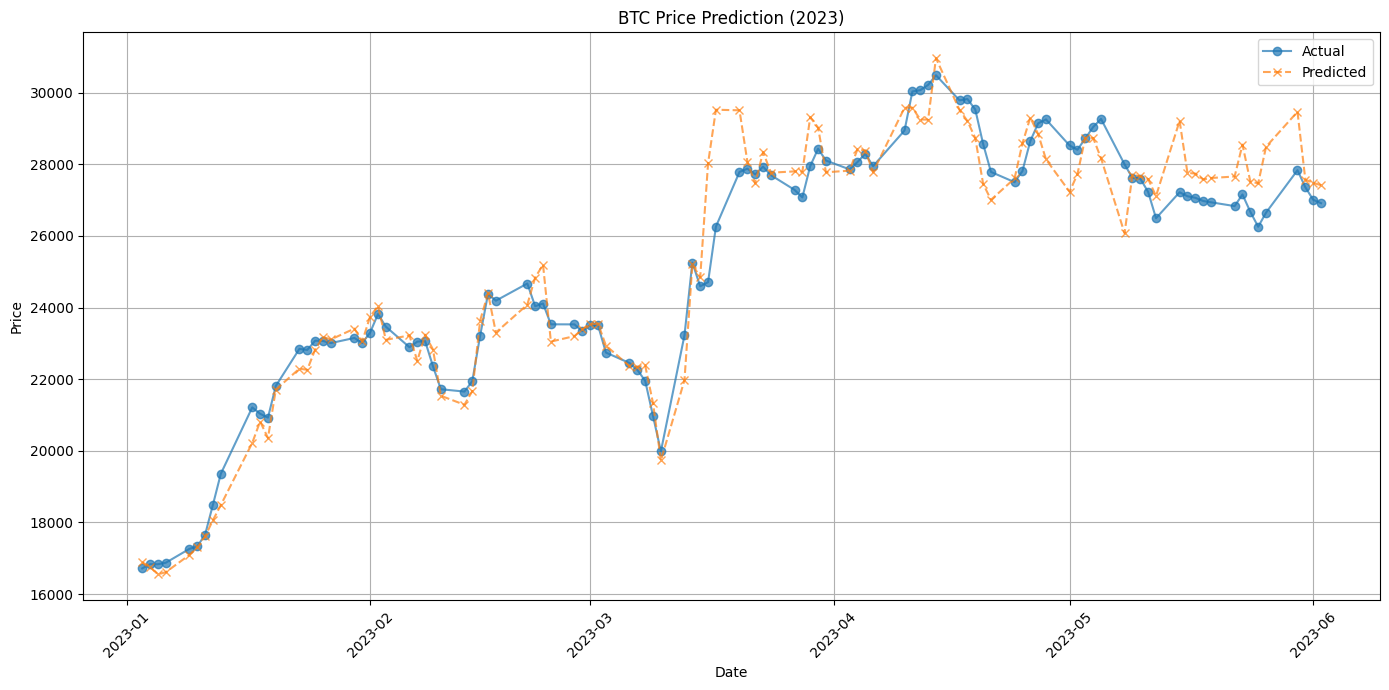

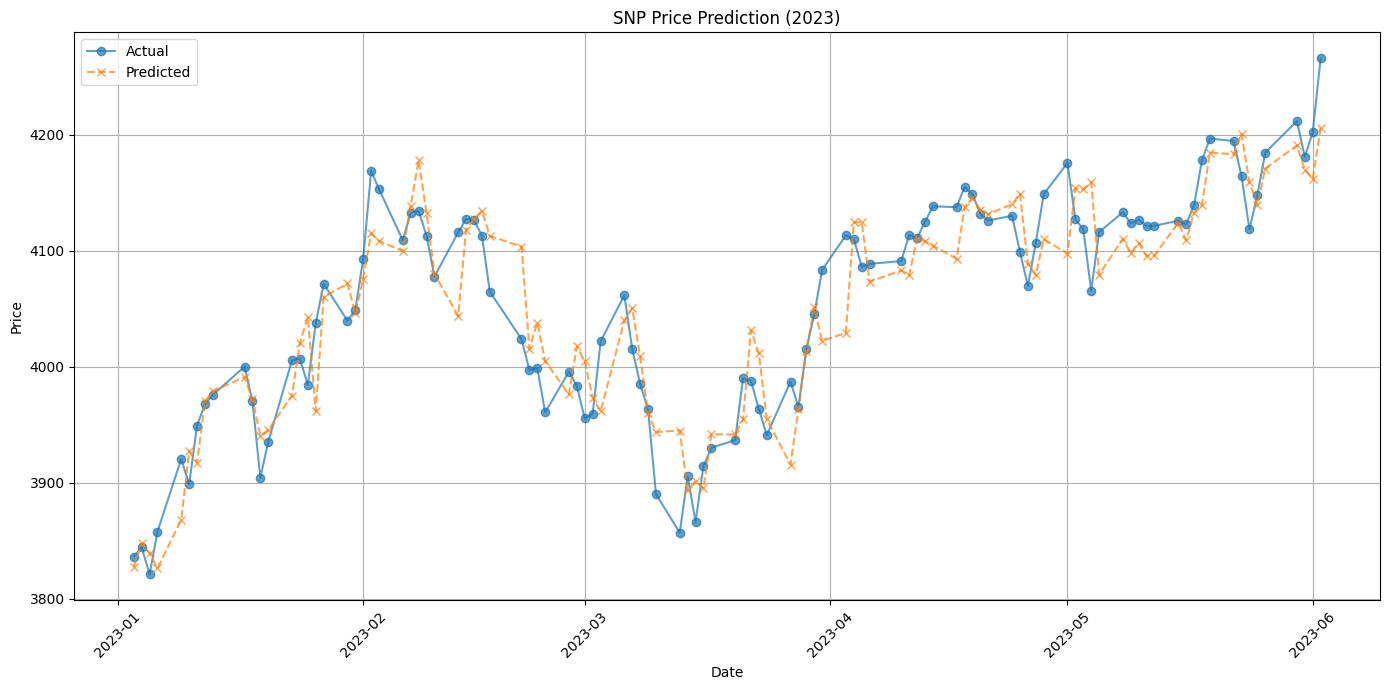

In [119]:
import pandas as pd
import numpy as np
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import matplotlib.pyplot as plt

# 1. 로그 변환을 적용한 새로운 컬럼 추가
def apply_log_transform(df, target_col):
    df[f"{target_col}_log"] = np.log1p(df[target_col])  # log(1+x)로 음수 방지
    return df

# 2. lag features 생성 함수
def create_lag_features(df, target_col, lags=10):
    for lag in range(1, lags + 1):
        df[f"{target_col}_lag_{lag}"] = df[target_col].shift(lag)
    return df

# 3. 이동 평균 및 변동성 생성 함수
def create_moving_features(df, target_col, window=5):
    df[f"{target_col}_ma_{window}"] = df[target_col].rolling(window=window).mean()
    df[f"{target_col}_std_{window}"] = df[target_col].rolling(window=window).std()
    return df

# 4. 데이터 준비
common_dates['Date'] = pd.to_datetime(common_dates['Date'])
common_dates = common_dates.sort_values(by='Date').reset_index(drop=True)

# BTC 로그 변환 적용
common_dates = apply_log_transform(common_dates, 'Price_btc')

# lag features 및 이동 평균/변동성 생성
lags = 10  # BTC는 더 많은 lag 사용
common_dates = create_lag_features(common_dates, 'Price_btc_log', lags)  # BTC 로그 사용
common_dates = create_lag_features(common_dates, 'Price_snp', lags)
common_dates = create_moving_features(common_dates, 'Price_snp', window=5)

# NaN 제거
common_dates = common_dates.dropna()

# 5. 2022년까지 학습 데이터, 2023년 테스트 데이터 분리
train_data = common_dates[common_dates['Date'] < '2023-01-01']
test_data = common_dates[common_dates['Date'] >= '2023-01-01']

# 입력과 출력 데이터 분리 (BTC)
X_train_btc = train_data.drop(['Date', 'Price_btc', 'Price_btc_log'], axis=1)
y_train_btc = train_data['Price_btc_log']  # 로그 변환된 값 예측
X_test_btc = test_data.drop(['Date', 'Price_btc', 'Price_btc_log'], axis=1)
y_test_btc = test_data['Price_btc_log']

# 입력과 출력 데이터 분리 (SNP)
X_train_snp = train_data.drop(['Date', 'Price_snp'], axis=1)
y_train_snp = train_data['Price_snp']
X_test_snp = test_data.drop(['Date', 'Price_snp'], axis=1)
y_test_snp = test_data['Price_snp']

# 6. 모델 학습
btc_model = LGBMRegressor(random_state=42)
snp_model = LGBMRegressor(random_state=42)

btc_model.fit(X_train_btc, y_train_btc)
snp_model.fit(X_train_snp, y_train_snp)

# 7. 예측
btc_preds_log = btc_model.predict(X_test_btc)
btc_preds = np.expm1(btc_preds_log)  # 로그 역변환
snp_preds = snp_model.predict(X_test_snp)

# 8. 평가 함수
def evaluate_model(actual, predicted, label):
    mae = mean_absolute_error(actual, predicted)
    rmse = np.sqrt(mean_squared_error(actual, predicted))
    r2 = r2_score(actual, predicted)
    print(f"{label} Prediction Metrics:")
    print(f"  MAE  : {mae:.4f}")
    print(f"  RMSE : {rmse:.4f}")
    print(f"  R²   : {r2:.4f}")
    print()

# BTC 평가 (로그 역변환된 값으로)
evaluate_model(np.expm1(y_test_btc), btc_preds, label="BTC")

# SNP 평가
evaluate_model(y_test_snp, snp_preds, label="SNP")

# 9. 시각화 함수
def plot_predictions_with_time(date_index, actual, predicted, title):
    plt.figure(figsize=(14, 7))
    plt.plot(date_index, actual, label="Actual", marker='o', linestyle='-', alpha=0.7)
    plt.plot(date_index, predicted, label="Predicted", marker='x', linestyle='--', alpha=0.7)
    plt.title(title)
    plt.xlabel("Date")
    plt.ylabel("Price")
    plt.xticks(rotation=45)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

# 테스트 데이터 날짜
btc_test_dates = test_data['Date']
snp_test_dates = test_data['Date']

# BTC 예측 결과 시각화
plot_predictions_with_time(btc_test_dates, np.expm1(y_test_btc), btc_preds, title="BTC Price Prediction (2023)")

# SNP 예측 결과 시각화
plot_predictions_with_time(snp_test_dates, y_test_snp, snp_preds, title="SNP Price Prediction (2023)")


- BTC:
    - 로그 변환과 lags=10을 통해 모델이 더 정교해졌으며, 큰 변동성을 다루는 데 효과를 보임
    - RMSE와 R²의 개선 폭이 의미가 있어보임

- SNP:

    - 이동 평균(MA)과 변동성(std)을 추가했지만, S&P 500의 안정적인 특성상 성능 개선 폭이 제한적으로 보임